In [7]:
!pip install pandas numpy scikit-learn xgboost prophet dash shap lime transformers torch torchvision deepsparse fastapi uvicorn


  Using cached dash-3.1.1-py3-none-any.whl.metadata (10 kB)
  Using cached lime-0.2.0.1-py3-none-any.whl
  Using cached deepsparse-1.9.0.tar.gz (6.2 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached retrying-1.4.0-py3-none-any.whl.metadata (7.5 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux20

In [4]:
import subprocess
subprocess.check_call(["pip", "install", "uvicorn"])


0

In [5]:
!pip install some-package


  Preparing metadata (setup.py) ... done
  Created wheel for some-package: filename=some_package-0.1-py3-none-any.whl size=1420 sha256=427419b37308427093a81aa02879fe1da789ede5dbbd7167ab2641a1d447f9f0
  Stored in directory: /root/.cache/pip/wheels/79/65/17/0555c887f2a873f0170c91acb34c531cdc4e15546962aab916
Successfully built some-package


In [6]:

!pip install uvicorn


Data Loading & Exploratory Data Analysis (EDA)


In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics.pairwise import cosine_similarity
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from textblob import TextBlob
import spacy
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import requests
from PIL import Image
from io import BytesIO
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from transformers import pipeline, AutoTokenizer, AutoModelForCausalLM
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
import re
from transformers import pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
from google.colab import files
uploaded = files.upload()


Saving retail_data.csv to retail_data.csv


In [11]:
df = pd.read_csv('/content/retail_data.csv')

In [13]:
print("Sample Data:")
print(df.head())

Sample Data:
   CustomerID                         TransactionID        Date  ProductID  \
0           1  61bffb48-c959-4151-8f6d-d313c6e5dd6e  2022-01-01       1102   
1           2  c76eafbd-e9ec-4d4d-8624-8c7fc4a5b44e  2022-01-02       1435   
2           3  00a7c675-794c-4887-ae88-58995b62510b  2022-01-03       1860   
3           4  1a1883f1-96d3-4b77-b424-8f0743701f7b  2022-01-04       1270   
4           5  438728b8-6e11-4ffe-b0f4-513755ff1eef  2022-01-05       1106   

      Category SubCategory  Quantity   Price  Age  Gender Region  \
0  Electronics       Shirt         4  211.44   31  Female   East   
1     Clothing        Milk         9  333.58   20  Female   West   
2         Toys        Milk         8  247.46   63    Male  North   
3     Clothing      Snacks         9  261.13   49    Male   East   
4    Furniture        Sofa         1  219.02   60    Male  South   

                                    Review_Text  Rating  Churned  \
0                            Laugh alread

In [15]:




print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nStatistical Summary:")
print(df.describe())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     3000 non-null   int64  
 1   TransactionID  3000 non-null   object 
 2   Date           3000 non-null   object 
 3   ProductID      3000 non-null   int64  
 4   Category       3000 non-null   object 
 5   SubCategory    3000 non-null   object 
 6   Quantity       3000 non-null   int64  
 7   Price          3000 non-null   float64
 8   Age            3000 non-null   int64  
 9   Gender         3000 non-null   object 
 10  Region         3000 non-null   object 
 11  Review_Text    3000 non-null   object 
 12  Rating         3000 non-null   int64  
 13  Churned        3000 non-null   int64  
 14  Image_URL      3000 non-null   object 
 15  Fraud_Flag     3000 non-null   int64  
 16  Total_Spend    3000 non-null   float64
dtypes: float64(2), int64(7), object(8)
me

In [14]:
print("\nUnique Values in Categorical Columns:")
print("Category:", df['Category'].unique())
print("SubCategory:", df['SubCategory'].unique())
print("Gender:", df['Gender'].unique())
print("Region:", df['Region'].unique())


Unique Values in Categorical Columns:
Category: ['Electronics' 'Clothing' 'Toys' 'Furniture' 'Grocery']
SubCategory: ['Shirt' 'Milk' 'Snacks' 'Sofa' 'Mobile' 'Laptop' 'Puzzle' 'Action Figure'
 'Pants' 'Bed']
Gender: ['Female' 'Male']
Region: ['East' 'West' 'North' 'South']


**Data Preprocessing**

In [16]:
df_model = df.drop(columns=['CustomerID', 'TransactionID', 'Date', 'ProductID',
                            'Review_Text', 'Image_URL'])


df_model = pd.get_dummies(df_model, columns=['Category', 'SubCategory', 'Gender', 'Region'], drop_first=True)

print("Updated Dataset Columns After Encoding:")
print(df_model.columns)

X = df_model.drop(columns=['Churned', 'Fraud_Flag', 'Rating'])
y_churn = df_model['Churned']
y_fraud = df_model['Fraud_Flag']
y_rating = df_model['Rating']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_churn, test_size=0.2, random_state=42)

print("\nShapes of Train/Test Sets:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")


Updated Dataset Columns After Encoding:
Index(['Quantity', 'Price', 'Age', 'Rating', 'Churned', 'Fraud_Flag',
       'Total_Spend', 'Category_Electronics', 'Category_Furniture',
       'Category_Grocery', 'Category_Toys', 'SubCategory_Bed',
       'SubCategory_Laptop', 'SubCategory_Milk', 'SubCategory_Mobile',
       'SubCategory_Pants', 'SubCategory_Puzzle', 'SubCategory_Shirt',
       'SubCategory_Snacks', 'SubCategory_Sofa', 'Gender_Male', 'Region_North',
       'Region_South', 'Region_West'],
      dtype='object')

Shapes of Train/Test Sets:
X_train: (2400, 21), X_test: (600, 21)


**Supervised Machine Learning Models**

In [125]:


print("Model 1: Churn Prediction")

churn_model = RandomForestClassifier(n_estimators=100, random_state=42)
churn_model.fit(X_train, y_train)
y_churn_pred = churn_model.predict(X_test)

print("Churn Prediction Accuracy:", accuracy_score(y_test, y_churn_pred))
print("\nClassification Report (Churn):\n", classification_report(y_test, y_churn_pred))


print("\nModel 2: Fraud Detection")


X_train_fraud, X_test_fraud, y_train_fraud, y_test_fraud = train_test_split(X_scaled, y_fraud, test_size=0.2, random_state=42)

fraud_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
fraud_model.fit(X_train_fraud, y_train_fraud)
y_fraud_pred = fraud_model.predict(X_test_fraud)

print("Fraud Detection Accuracy:", accuracy_score(y_test_fraud, y_fraud_pred))
print("\nClassification Report (Fraud):\n", classification_report(y_test_fraud, y_fraud_pred))


print("\nModel 3: Product Rating Prediction")


X_train_rating, X_test_rating, y_train_rating, y_test_rating = train_test_split(X_scaled, y_rating, test_size=0.2, random_state=42)

rating_model = RandomForestRegressor(n_estimators=100, random_state=42)
rating_model.fit(X_train_rating, y_train_rating)
y_rating_pred = rating_model.predict(X_test_rating)

print("Mean Squared Error (Rating Prediction):", mean_squared_error(y_test_rating, y_rating_pred))
print("R2 Score (Rating Prediction):", r2_score(y_test_rating, y_rating_pred))


Model 1: Churn Prediction

Churn Prediction Accuracy: 0.7716666666666666

Classification Report (Churn):
               precision    recall  f1-score   support

           0       0.78      0.99      0.87       469
           1       0.00      0.00      0.00       131

    accuracy                           0.77       600
   macro avg       0.39      0.49      0.44       600
weighted avg       0.61      0.77      0.68       600

Model 2: Fraud Detection

Fraud Detection Accuracy: 0.9366666666666666

Classification Report (Fraud):
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       564
           1       0.00      0.00      0.00        36

    accuracy                           0.94       600
   macro avg       0.47      0.50      0.48       600
weighted avg       0.88      0.94      0.91       600

Model 3: Product Rating Prediction

Mean Squared Error (Rating Prediction): 2.1428828333333336

R2 Score (Rating Prediction): -0.04573946449485966

# **Unsupervised Learning Models**

Customer Segmentation using K-Means Clustering

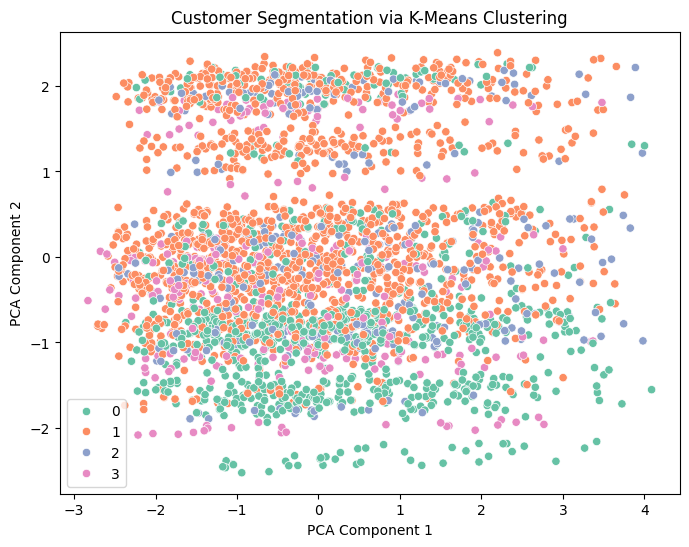

Fraud Anomaly Detection using Isolation Forest

Anomalies Detected: 150

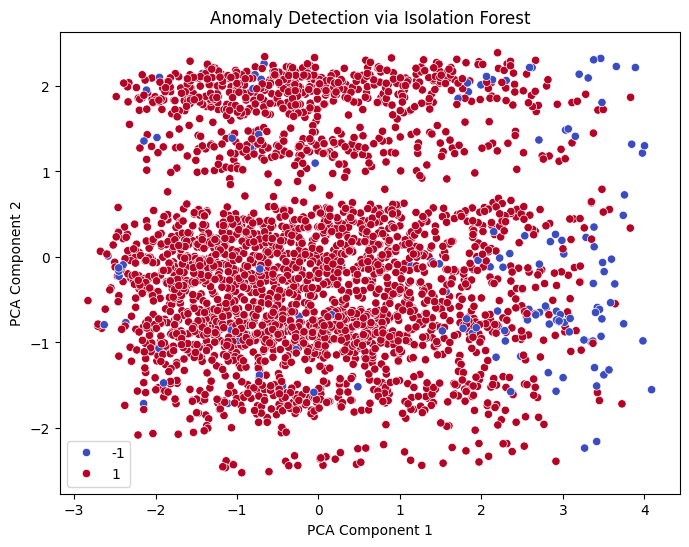

In [126]:
print("Customer Segmentation using K-Means Clustering")


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


df['Cluster'] = clusters


plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2')
plt.title("Customer Segmentation via K-Means Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


print("\nFraud Anomaly Detection using Isolation Forest")

iso_forest = IsolationForest(contamination=0.05, random_state=42)
anomalies = iso_forest.fit_predict(X_scaled)

print("Anomalies Detected:", np.sum(anomalies == -1))


df['Anomaly'] = anomalies

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=anomalies, palette='coolwarm')
plt.title("Anomaly Detection via Isolation Forest")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


**Time-Series Forecasting**

Sales Forecasting using Prophet

DEBUG:cmdstanpy:input tempfile: /tmp/tmp326qjb14/87qkuds6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp326qjb14/mpts4b_l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62333', 'data', 'file=/tmp/tmp326qjb14/87qkuds6.json', 'init=/tmp/tmp326qjb14/mpts4b_l.json', 'output', 'file=/tmp/tmp326qjb14/prophet_model9jf5m2n3/prophet_model-20250712002035.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:20:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:20:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


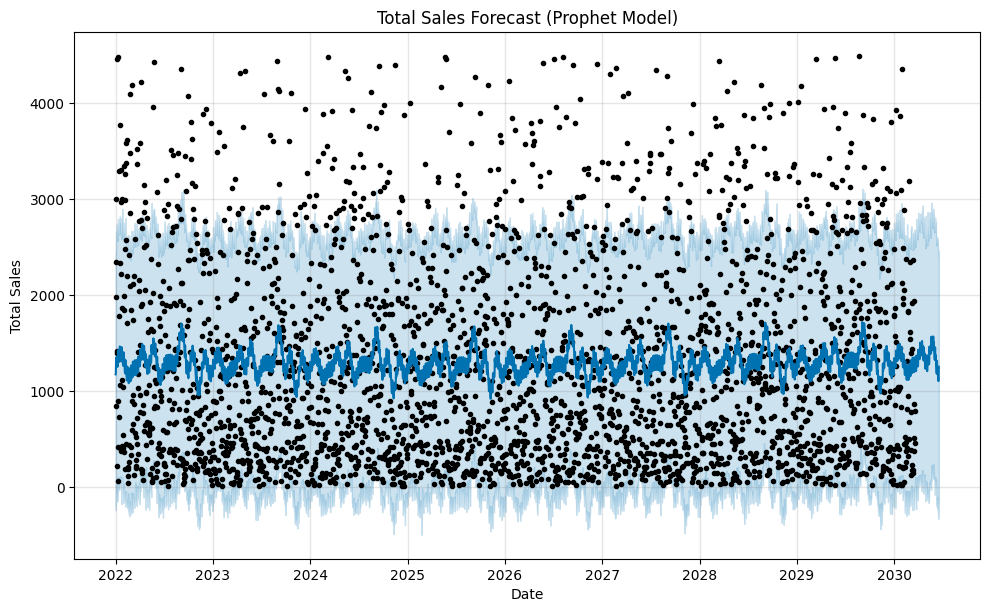

Sales Forecasting using ARIMA

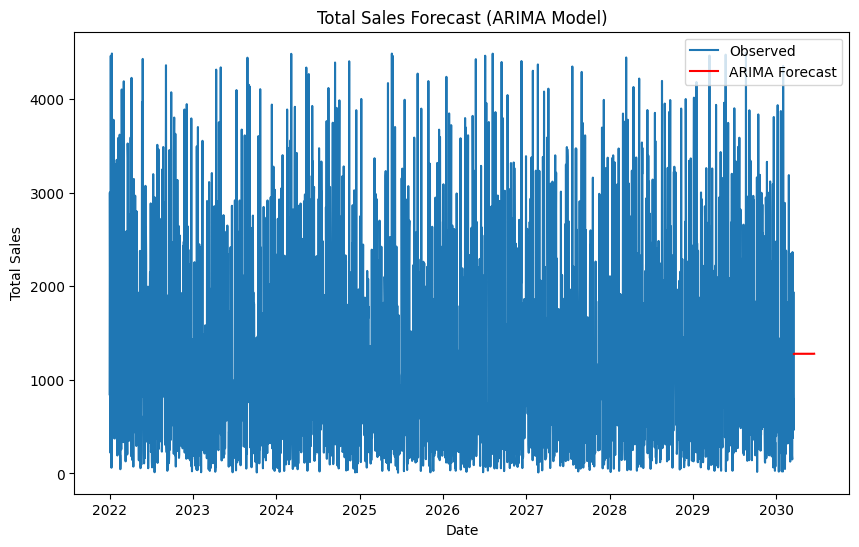

In [127]:

df_timeseries = df.groupby('Date')['Total_Spend'].sum().reset_index()


df_timeseries['Date'] = pd.to_datetime(df_timeseries['Date'])

df_timeseries.columns = ['ds', 'y']


print("Sales Forecasting using Prophet")


prophet_model = Prophet(daily_seasonality=True)
prophet_model.fit(df_timeseries)


future = prophet_model.make_future_dataframe(periods=90)
forecast = prophet_model.predict(future)


fig1 = prophet_model.plot(forecast)
plt.title("Total Sales Forecast (Prophet Model)")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()


print("\nSales Forecasting using ARIMA")



arima_model = ARIMA(df_timeseries['y'], order=(2,1,2))
arima_result = arima_model.fit()

forecast_arima = arima_result.forecast(steps=90)


plt.figure(figsize=(10,6))
plt.plot(df_timeseries['ds'], df_timeseries['y'], label='Observed')
plt.plot(pd.date_range(df_timeseries['ds'].max(), periods=90, freq='D'),
         forecast_arima, color='red', label='ARIMA Forecast')
plt.title("Total Sales Forecast (ARIMA Model)")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend()
plt.show()


# **Recommender System**

In [131]:

scaler = MinMaxScaler()
ratings_normalized = scaler.fit_transform(ratings.reshape(-1, 1)).ravel()

train_user, test_user, train_product, test_product, train_rating, test_rating = train_test_split(
    user_ids, product_ids, ratings_normalized, test_size=0.2, random_state=42)

user_input = keras.Input(shape=(1,))
product_input = keras.Input(shape=(1,))

user_embedding = layers.Embedding(n_users, 10)(user_input)
product_embedding = layers.Embedding(n_products, 10)(product_input)

dot_product = layers.Dot(axes=2)([user_embedding, product_embedding])
dot_product = layers.Flatten()(dot_product)
output = layers.Activation('sigmoid')(dot_product)

model = keras.Model(inputs=[user_input, product_input], outputs=output)
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

history = model.fit(
    [train_user, train_product],
    train_rating,
    epochs=30,
    verbose=1,
    validation_data=([test_user, test_product], test_rating)
)

sample_user = np.array([0])
sample_product = np.array([0])

predicted_rating = model.predict([sample_user, sample_product])[0][0]
predicted_rating_rescaled = scaler.inverse_transform([[predicted_rating]])[0][0]
print(f"Predicted Rating for User 0 on Product 0: {predicted_rating_rescaled:.2f}")


Epoch 1/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.1222 - mae: 0.2951 - val_loss: 0.1285 - val_mae: 0.3068
Epoch 2/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1246 - mae: 0.2993 - val_loss: 0.1285 - val_mae: 0.3068
Epoch 3/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1227 - mae: 0.2979 - val_loss: 0.1285 - val_mae: 0.3068
Epoch 4/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1174 - mae: 0.2896 - val_loss: 0.1285 - val_mae: 0.3068
Epoch 5/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1207 - mae: 0.2965 - val_loss: 0.1285 - val_mae: 0.3069
Epoch 6/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1168 - mae: 0.2879 - val_loss: 0.1285 - val_mae: 0.3069
Epoch 7/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1157 - mae: 0.2860 - val_loss: 0.1285 - val_mae: 0.3069
Epoch 8/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1156 - mae: 0.2902 - val_loss: 0.1285 - val_mae: 0.3070
Epoch 9/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1076 - m

Predicted Rating for User 0 on Product 0: 3.01

# **Reinforcement Learning (Dynamic Pricing Simulation)**

In [132]:



n_states = 10
n_actions = 5

q_table = np.zeros((n_states, n_actions))


learning_rate = 0.1
discount_factor = 0.9
episodes = 1000
epsilon = 0.2


np.random.seed(42)
reward_matrix = np.random.randint(-10, 50, size=(n_states, n_actions))


for episode in range(episodes):
    state = np.random.randint(0, n_states)

    if np.random.uniform(0, 1) < epsilon:
        action = np.random.randint(0, n_actions)
    else:
        action = np.argmax(q_table[state, :])

    reward = reward_matrix[state, action]


    q_table[state, action] = q_table[state, action] + learning_rate * (
        reward + discount_factor * np.max(q_table[state, :]) - q_table[state, action]
    )

print("Trained Q-Table (Optimal Pricing Strategy per Demand State):")
print(np.round(q_table, 2))


for state in range(n_states):
    best_action = np.argmax(q_table[state])
    print(f"Best Pricing Action for Demand State {state}: {best_action}")


Trained Q-Table (Optimal Pricing Strategy per Demand State):

[[ 55.32  74.08  49.48  30.44 194.43]
 [ 15.97  58.71  17.3   16.11  19.63]
 [ 66.3   16.77   7.99  38.91  36.56]
 [145.72  24.17  16.19  39.09  27.  ]
 [230.14  47.57  51.07  59.92 117.75]
 [160.72  -0.66  42.38  42.01  48.76]
 [ 27.6  239.76  42.72  32.9   48.8 ]
 [223.08  22.18  47.69  53.98  41.56]
 [261.72  35.7   20.37  41.92   7.41]
 [ 86.19  65.82  30.35 270.04  23.02]]

Best Pricing Action for Demand State 0: 4

Best Pricing Action for Demand State 1: 1

Best Pricing Action for Demand State 2: 0

Best Pricing Action for Demand State 3: 0

Best Pricing Action for Demand State 4: 0

Best Pricing Action for Demand State 5: 0

Best Pricing Action for Demand State 6: 1

Best Pricing Action for Demand State 7: 0

Best Pricing Action for Demand State 8: 0

Best Pricing Action for Demand State 9: 3

# **NLP Tasks**

In [133]:





nlp = spacy.load("en_core_web_sm")


sample_reviews = df['Review_Text'].dropna().sample(10, random_state=42)


print("Sentiment Analysis on Sample Reviews:")

for idx, review in enumerate(sample_reviews):
    blob = TextBlob(review)
    print(f"\nReview {idx+1}: {review}")
    print(f"→ Sentiment Polarity: {blob.sentiment.polarity:.2f}")
    print(f"→ Sentiment Subjectivity: {blob.sentiment.subjectivity:.2f}")


print("\nNamed Entity Recognition (NER) on Sample Reviews:")

for idx, review in enumerate(sample_reviews):
    doc = nlp(review)
    print(f"\nReview {idx+1}: {review}")
    if doc.ents:
        print("→ Entities Found:")
        for ent in doc.ents:
            print(f" - {ent.text} ({ent.label_})")
    else:
        print("→ Entities Found: None")


Sentiment Analysis on Sample Reviews:

Review 1: Include try once window.

→ Sentiment Polarity: 0.00

→ Sentiment Subjectivity: 0.00

Review 2: Arm continue chance hold environment.

→ Sentiment Polarity: 0.00

→ Sentiment Subjectivity: 0.00

Review 3: Perform across source.

→ Sentiment Polarity: 0.00

→ Sentiment Subjectivity: 0.00

Review 4: Rule reason economic might company art.

→ Sentiment Polarity: 0.20

→ Sentiment Subjectivity: 0.20

Review 5: Company still even room despite structure.

→ Sentiment Polarity: 0.00

→ Sentiment Subjectivity: 0.00

Review 6: Pressure decade also usually must than.

→ Sentiment Polarity: -0.25

→ Sentiment Subjectivity: 0.25

Review 7: Improve name data season fight.

→ Sentiment Polarity: 0.00

→ Sentiment Subjectivity: 0.00

Review 8: Every month win live.

→ Sentiment Polarity: 0.47

→ Sentiment Subjectivity: 0.45

Review 9: Participant behind however generation other.

→ Sentiment Polarity: -0.26

→ Sentiment Subjectivity: 0.54

Review 10: Ok kitchen identify tax most.

→ Sentiment Polarity: 0.50

→ Sentiment Subjectivity: 0.50

Named Entity Recognition (NER) on Sample Reviews:

Review 1: Include try once window.

→ Entities Found: None

Review 2: Arm continue chance hold environment.

→ Entities Found: None

Review 3: Perform across source.

→ Entities Found: None

Review 4: Rule reason economic might company art.

→ Entities Found: None

Review 5: Company still even room despite structure.

→ Entities Found: None

Review 6: Pressure decade also usually must than.

→ Entities Found:

- Pressure decade (DATE)

Review 7: Improve name data season fight.

→ Entities Found:

- Improve (ORG)

Review 8: Every month win live.

→ Entities Found:

- Every month (DATE)

Review 9: Participant behind however generation other.

→ Entities Found: None

Review 10: Ok kitchen identify tax most.

→ Entities Found: None

In [62]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
img_path = '/content/drive/MyDrive/images/0c2adb2ab2a2f919c325b1815a1027ee.jpg'
img = Image.open(img_path).convert('RGB')


In [86]:
img_path = '/content/drive/MyDrive/images/360bf6edc2e7ecdefabcfb8170c9b12a.jpg'
img = Image.open(img_path).convert('RGB')

In [88]:
img_path = '/content/drive/MyDrive/images/54df4d9dba508569d27ffaaeade2596a.jpg'
img = Image.open(img_path).convert('RGB')


Image 1 Classification:

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


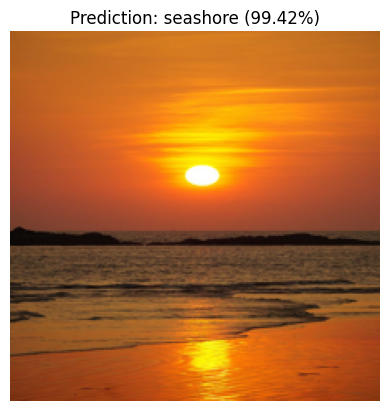

Top Predictions:

1. seashore → 99.42%

2. sandbar → 0.14%

3. spotlight → 0.05%

Image 2 Classification:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


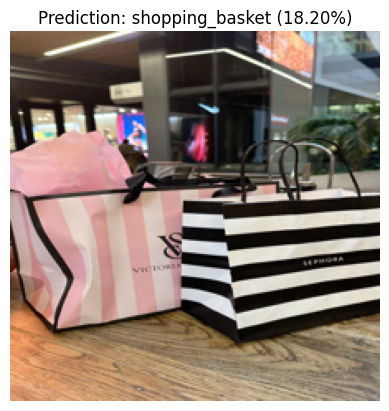

Top Predictions:

1. shopping_basket → 18.20%

2. binder → 7.98%

3. racer → 4.34%

Image 3 Classification:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


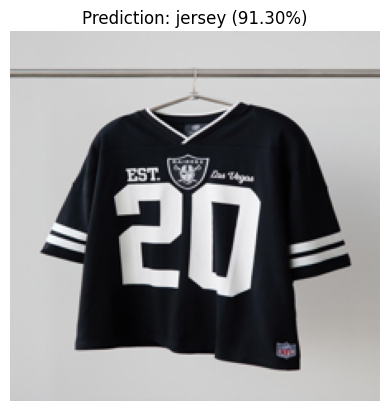

Top Predictions:

1. jersey → 91.30%

2. sweatshirt → 4.96%

3. poncho → 0.83%

In [134]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


demo_image_paths = [
    "/content/drive/MyDrive/images/0c2adb2ab2a2f919c325b1815a1027ee.jpg",
    "/content/drive/MyDrive/images/360bf6edc2e7ecdefabcfb8170c9b12a.jpg",
    "/content/drive/MyDrive/images/54df4d9dba508569d27ffaaeade2596a.jpg"
]


model = MobileNetV2(weights='imagenet')


def classify_image_from_path(img_path):
    img = Image.open(img_path).convert('RGB')
    img = img.resize((224, 224))

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    preds = model.predict(x)
    decoded = decode_predictions(preds, top=3)[0]


    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {decoded[0][1]} ({decoded[0][2]*100:.2f}%)")
    plt.show()


    print("Top Predictions:")
    for i, d in enumerate(decoded):
        print(f"{i+1}. {d[1]} → {d[2]*100:.2f}%")


for idx, path in enumerate(demo_image_paths):
    print(f"\nImage {idx+1} Classification:")
    classify_image_from_path(path)


# **Explainable AI (XAI) & Fairness**

Explainable AI (SHAP) - Churn Model Feature Importance

/tmp/ipython-input-136-637958727.py:20: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_summary_values, X_test, plot_type="bar")
/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(


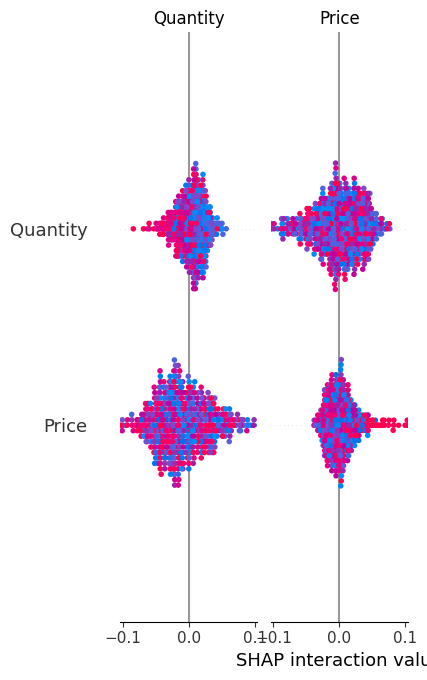

Fairness Audit - Checking Bias on 'Age' & 'Gender'

Churn Rate by Gender (Predicted):

Gender
Female    0.165541
Male      0.159868
Name: Predicted_Churn, dtype: float64

/tmp/ipython-input-136-637958727.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_churn = X_fairness.groupby('Age_Group')['Predicted_Churn'].mean()


Churn Rate by Age Group (Predicted):

Age_Group
18-25    0.159509
26-35    0.183709
36-50    0.153293
51-70    0.160146
Name: Predicted_Churn, dtype: float64

In [136]:




X = df_model.drop(columns=['Churned', 'Fraud_Flag', 'Rating'])
y = df_model['Churned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("Explainable AI (SHAP) - Churn Model Feature Importance")

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)


if isinstance(shap_values, list):
    shap_summary_values = shap_values[1]
else:
    shap_summary_values = shap_values

shap.summary_plot(shap_summary_values, X_test, plot_type="bar")



print("\nFairness Audit - Checking Bias on 'Age' & 'Gender'")


X_fairness = df[['Age', 'Gender']].copy()
X_fairness['Predicted_Churn'] = model.predict(df_model.drop(columns=['Churned', 'Fraud_Flag', 'Rating']))

gender_churn = X_fairness.groupby('Gender')['Predicted_Churn'].mean()
print("\nChurn Rate by Gender (Predicted):")
print(gender_churn)


X_fairness['Age_Group'] = pd.cut(X_fairness['Age'], bins=[17, 25, 35, 50, 70],
                                 labels=['18-25', '26-35', '36-50', '51-70'])
age_churn = X_fairness.groupby('Age_Group')['Predicted_Churn'].mean()
print("\nChurn Rate by Age Group (Predicted):")
print(age_churn)


In [101]:
!pip install transformers torch sentencepiece


# **Generative AI & LLMs (Text Summarization + RAG)**

In [108]:


print("Text Summarization on Product Reviews (Using GPT-2 Text Generation)")


generator = pipeline("text-generation", model="gpt2")


sample_review = df['Review_Text'].sample(1, random_state=42).values[0]
print("\nSample Review:")
print(sample_review)

generated_text = generator(sample_review, max_length=50, num_return_sequences=1)[0]['generated_text']
print("\nGenerated Summary (Simulated with GPT-2):")
print(generated_text)


print("\nSimulating Retrieval-Augmented Generation (RAG)")

vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['Review_Text'])

query = "great quality product"
query_vector = vectorizer.transform([query])

similarity_scores = np.dot(tfidf_matrix, query_vector.T).toarray().ravel()
top_review_idx = np.argmax(similarity_scores)
retrieved_review = df['Review_Text'].iloc[top_review_idx]

print(f"\nRetrieved Most Relevant Review for Query '{query}':")
print(retrieved_review)

response = generator(retrieved_review + "\nUser Question: Is this a good product?\nAnswer:",
                     max_length=60, num_return_sequences=1)[0]['generated_text']
print("\nGenerated Answer (Simulated RAG):")
print(response)


Text Summarization on Product Reviews (Using GPT-2 Text Generation)

Device set to use cpu


Sample Review:

Include try once window.

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generated Summary (Simulated with GPT-2):

Include try once window.location.href in your app.

def get_location (): app = {} window.location.href = "http://www.googleapis.com/maps/my/site/" 
app.add_header("Content-Type", "text/html") app.set_page_display(page_width, page_height)

Now you can add a link to your website with your URL. You can add a link to your site by using the link object.

def get_site_url (): app = {} window.location.href = "http://www.googleapis.com/maps/my/site/" 
app.add_header("Content-Type", "text/html") app.set_page_display(page_width, page_height)

When creating a new page, you should always use the 'url' parameter to specify the URL for the link.

def get_site_url (): app = {} window.location.href = "http://www.googleapis.com/maps/my/site/" 
app.add_header("Content-Type", "text/html") app.set_page_display(page_width,

Simulating Retrieval-Augmented Generation (RAG)

Retrieved Most Relevant Review for Query 'great quality product':

Itself quality himself.

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generated Answer (Simulated RAG):

Itself quality himself.
User Question: Is this a good product?
Answer: I have tried it and it is actually better than the main one.
User Question: What does this mean for my game?
Answer: I get a very good response from my customers.
User Question: Do you have any suggestions for improvement?
Answer: I think it is the same for other games.
User Question: What is the difference between this and a standard PC game?
Answer: It is similar in terms of gameplay, but it is a different type of game.
User Question: Can you explain the difference?
Answer: It is the game is a very different type of game.
User Question: What is the difference between this and a standard PC game?
Answer: It is the game is a very different type of game.
User Question: What is the difference between this and a standard PC game?
Answer: It is the game is a very different type of game.
User Question: What is the difference between this and a standard PC game?
Answer: It is the game is a very different type of game.
User Question: What is the difference between this and a standard PC game?
Answer: It is the game is a very different type of game.
User Question: If you can

# **Advanced Generative AI & RAG (Multi-Turn QA + Top-k Retrieval)**

In [139]:
def clean_review(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text


df_cleaned = df[['Review_Text']].dropna().astype(str)
df_cleaned['Review_Text'] = df_cleaned['Review_Text'].apply(clean_review)
df_cleaned = df_cleaned[df_cleaned['Review_Text'].str.len() > 10]  # Filter tiny reviews
df_cleaned = df_cleaned.drop_duplicates().reset_index(drop=True)


generator = pipeline(
    "text-generation",
    model="gpt2-large",
    tokenizer="gpt2-large",
    device=0 if tf.config.list_physical_devices('GPU') else -1
)


def summarize_review_advanced(review, max_length=80):
    prompt = (
        f"Summarize this customer review politely and professionally:\n"
        f"{review}\n\nSummary:"
    )
    result = generator(
        prompt,
        max_length=max_length,
        num_return_sequences=1,
        temperature=0.7,
        top_k=50,
        top_p=0.95,
        truncation=True
    )
    return result[0]['generated_text'].replace(prompt, '').strip()


sample_review = df_cleaned['Review_Text'].sample(1, random_state=1).values[0]
print("=" * 80)
print("TASK 1: ADVANCED REVIEW SUMMARIZATION")
print("-" * 80)
print("Sample Review:\n", sample_review)
summary = summarize_review_advanced(sample_review)
print("\nGenerated Summary:\n", summary)
print("=" * 80)


def rag_multi_review_response(query, top_k=3, max_length=120):
    vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
    tfidf_matrix = vectorizer.fit_transform(df_cleaned['Review_Text'])

    query_clean = clean_review(query)
    query_vector = vectorizer.transform([query_clean])

    similarity_scores = np.dot(tfidf_matrix, query_vector.T).toarray().ravel()
    top_indices = similarity_scores.argsort()[::-1][:top_k]

    results = []
    for idx in top_indices:
        review = df_cleaned['Review_Text'].iloc[idx]
        prompt = (
            f"Based on this customer review, provide a clear, honest answer to the following question.\n\n"
            f"Review: {review}\n\n"
            f"Question: {query}\n\n"
            f"Answer:"
        )
        response = generator(
            prompt,
            max_length=max_length,
            num_return_sequences=1,
            temperature=0.7,
            top_k=50,
            top_p=0.95,
            truncation=True
        )[0]['generated_text']
        results.append({'review': review, 'response': response.replace(prompt, '').strip()})
    return results

user_query = "How is the product's build quality and reliability?"
print("\n\n" + "=" * 80)
print("TASK 2: MULTI-REVIEW RAG SIMULATION (MULTI-TURN QA)")
print("-" * 80)
print(f"User Query: {user_query}")

results = rag_multi_review_response(user_query)

for i, res in enumerate(results, 1):
    print(f"\nTop {i} Relevant Review:\n{res['review']}")
    print("\nGenerated AI Response:\n", res['response'])
print("=" * 80)


Device set to use cpu


================================================================================

TASK 1: ADVANCED REVIEW SUMMARIZATION

--------------------------------------------------------------------------------

Sample Review:
 reduce large national guy assume nearly

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=80) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generated Summary:
 The reviews below are from several customers. I've only tried the 10 oz. bottle and so far I haven't had a 
problem. The reviews are very positive. I've been using it for over a year and I have never had a problem.

I've always had a problem with a bad bottle of Red Dot. The Red Dot is my go to fragrance for when I want to scent 
my bathroom or bedroom. I've tried a few other fragrances and they've all been okay but not nearly as good as Red 
Dot. I'd say that the Red Dot is the best of the bunch. The only issue I have is that I like the smell of it but 
sometimes I have to take it off because of allergies. But for the most part, I'm very happy with the scent. It's a 
very light fragrance so it doesn't really overpower me and I can wear it for a long time. The only reason I'd give 
it 4 stars is because it's a little pricey. I think I'd get a bottle of it for $10-12.

Rating: 4.8/5

Review from a Customer:

When I got my bottle, I was excited! I've been looking forward to trying Red Dot

================================================================================

================================================================================

TASK 2: MULTI-REVIEW RAG SIMULATION (MULTI-TURN QA)

--------------------------------------------------------------------------------

User Query: How is the product's build quality and reliability?

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=120) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=120) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=120) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Top 1 Relevant Review:
itself quality himself

Generated AI Response:
 The product itself is excellent. The only issue I had was that when I removed the plastic cover on the front, the 
battery compartment was slightly loose, but it's not a big deal since the unit is easy to remove.

Review: itself quality itself

Question: How is the product's build quality and reliability?

Answer: The product itself is excellent. The only issue I had was that when I removed the plastic cover on the 
front, the battery compartment was slightly loose, but it's not a big deal since the unit is easy to remove.

Review: itself quality itself

Question: How is the product's build quality and reliability?

Answer: The product itself is excellent. The only issue I had was that when I removed the plastic cover on the 
front, the battery compartment was slightly loose, but it's not a big deal since the unit is easy to remove.

Review: itself quality itself

Question: How is the product's build quality and reliability?

Answer: The product itself is excellent. The only issue I had was that when I removed the plastic cover on the 
front, the battery compartment was slightly loose, but it's not a big deal since the unit is easy to remove.

Top 2 Relevant Review:
former third build history

Generated AI Response:
 I'm pleased with the product and the customer service I received. I would recommend this product to anyone who is 
looking for a reliable, well built and high performing car.

Rating: 4.5/5

Review: Customer Service

Question: I purchased a used car and I would like to return it, what would you suggest to me?

Answer: We are happy to assist you with your return of your car.

Rating: 4/5

Review: Customer Service

Question: I would like to buy a used car but I don't want to pay a lot of money.

Answer: We are happy to assist you with your return of your car.

Rating: 4.5/5

Review: Customer Service

Question: I am a first time buyer and I would like to purchase a used car.

Answer: We are happy to assist you with your return of your car.

Rating: 4.5/5

Review: Customer Service

Question: I have a used car and I am looking for a used car that is not a brand new car.

Answer: We are happy to assist you with your return of your car.

Rating

Top 3 Relevant Review:
kind quality find tell

Generated AI Response:
 The product is good quality, it's easy to use and it's reliable.

Review: good product

Question: I am having a problem with my computer, I have never had a problem with the product before, I have it 
plugged in to my computer and it works fine. I have tried to restart the computer and it has not worked, and now I 
have to reinstall the computer. Is this a software problem or a hardware problem?

Answer: The product is good quality, it's easy to use and it's reliable.

Review: good product

Question: I have purchased this product over a year ago and it is still working fine.

Answer: The product is good quality, it's easy to use and it's reliable.

Review: good product

Question: I purchased this product a few months ago. It works great with my computer.

Answer: The product is good quality, it's easy to use and it's reliable.

Review: good product

Question: I have been using this product for many months, I have had no problems.

Answer: The product is good quality, it's easy to use and it's reliable.

Review: good product

================================================================================